# Linear Regrassion

Linear regression is one of the most fundamental algorithms in the machine learning world. It is the door to the magical world ahead . but before proceeding with the algorithm, let's first discuss the lifecycle of any machine learning model.  This diagram explains the creation of a machine learning model from scratch and than taking the same model further with hyperparameter tuning to increase its accuracy,deciding the deployment strategies for that model and once deployed setting up the logging and monitoring frameworks to generate reports and dashboards based on the client requirements a typical lifecycle diagram for a machine learning model looks like:


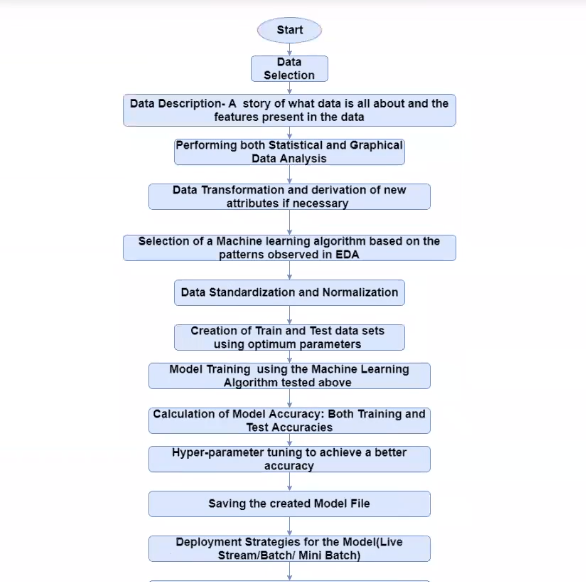

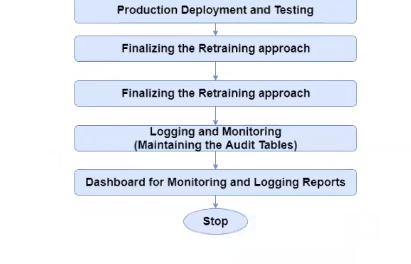

now,let's take our discussion of Linear Regression further.

## What is regression Analysis?





Regression in statistics is the process of predicting a Label (or Dependent Variable) based on the further(Independent Variables)at hand.Regression is used for time series modelling and finding the casual effect relationship between the variables and forecasting. For example, the relationship between the stock prices the company and various factors like customer reputation and company annual performance etc.can be studied using regression.

                Regression analysis is an important tool for analysing and modlling data. Here, we fit a curve/line to the data points,in such a manner that the differences between the distanceof the actual data points from the plotted curve/line is minimum. the topic will be explained in detail in the coming sections.

## The use of Regression 

Regression analyses the relationship between two or more features.Let's takean example:

Let's suppose we want to makean application which predicts the chances of admission a student to a foreign university.

The benefits of using Regression analysis are as follows:

- It shows thesignificant relationships between the lable (dependent variable) and the features (independent variable).
- It shows the extent of the impact  of multiple independent variables on the dependent variable.
- It can also measure these effects even if the variables are on a different scale.

These features enable the data scientists to find the best set of independent variables for predictions.

# Linear Regression

Linear Regression is one off the most fundamental and widely known Machine Learning algorithms which people start with.
Building blocks of a Linear Regression Model are:

- Discreet/ continuous  independent variables
- A best-fit regression line
- continuous dependent variable.i.e.,A Linear Regression model predicts the dependent variable using a regression linebased on independent variables.The equation of the Linear Regression is :
$$Y=a+b*X + e$$




Where, a is the intercept, b is the slope of the line,and e is the errorterm. The equation above is used to predict the valueof the target variable based on the given predictor variable(s).

### The Problem Statement

This data is about the amount spent on advertising through different channels like TV, Radio and Newspaper.The goal is to predict how the expense on each channel affects the sales and is there a way to optimise that sale?

In [1]:
# necessary import

import pandas as pd

import matplotlib.pyplot as plt

import pickle

%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\Pawan Kumar\Desktop\DATA SCIENCE\practice coding\Files-main\Advertising.csv') # Reading the data file

data.head() # Checking the first five rows from the dataset

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


What are the **features**?




- TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: Advertising dollars spent on Radio.
- Newspaper: Advertising dollars spent on Newspaper.
    
    
    
    
What is **response**?

- Sales: sales of a single product in a given market(in thousands of widgets) 

In [3]:
data.shape

(200, 5)

In [4]:
data.info()  # printing the summary of the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
data.isna().sum()  # finding the count of missing values from different columns

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

Now let's showcase the relationship between the feature and target column

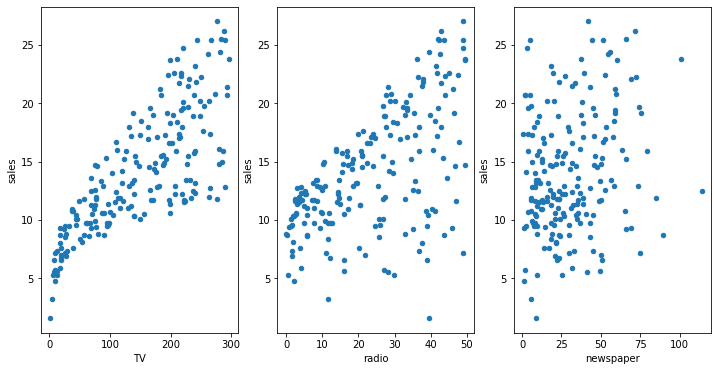

In [6]:
# Visualizing the relationship between the features and the response using scatterplots

fig, axs = plt.subplots(1,3)

data.plot(kind='scatter',x = 'TV', y = 'sales',ax=axs[0],figsize=(12,6))

data.plot(kind='scatter',x = 'radio', y = 'sales',ax=axs[1])

data.plot(kind='scatter',x = 'newspaper', y = 'sales',ax=axs[2])

fig.savefig('testdata.jpg')

# Questions about the data

A generic question shall be : How the company should optimise the spends on advertising to maximise the sales?



These general questions might lead you to more specific questions:



        1. What's the relationship between ads and sales ?
        
        2. How prominent is that relationship ?
        
        3. Which ad types contribute to sales?
        
        4. How each ad contributes to sales?
        
        5. Can sales be predicted based on the expense of the advertisement?
        
We Will explore these questions below!

From the relationship diagrams above, it can be observed that there seems to be a linear relationship between the features TV ad, Radio ad and the sales is almost a linear one. A linear relationship typically looka like:



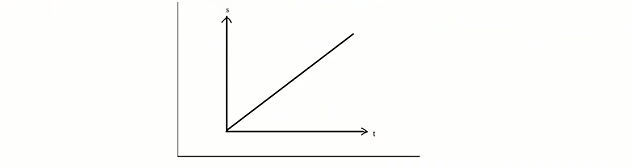



Hence,We can build a model using the Linear Regression Algorithm.

## Simple Linear Regression

https://www.desmos.com/calculator/2mqgoa6a4



Simple Linear regression is a method for predicting a **quantitative response** using a **single feature** ("input variable"). The mathematical equation is:






$y$=${\beta}_{0}+{\beta}_{1}x$



What do terms represent?

- $y$ is the response or the target variable 

- $x$ is the feature 

- ${\beta}_{0}$ is the intercept

- ${\beta}_{1}$ is the coefficient of $x$

${\beta}_{0}$ and ${\beta}_{1}$ are the **_models coefficients_** . To Create a model we must "learn" the value of these coefficients and once we have the value of these coefficients. we can use the model to predict the Sales!

**Estimating ("Learning") Model Coefficients**


The coefficients are estimated using the **least-squares criterion**, i.e.,the best fit line has to be calculated that minimizes the **sum of squared residuals**(or"sum of squared errors").

### The mathematics involved



Take a quick look at the plot created. Now consider each point, and know that each of them has a cooordinate in the form (X,Y).Now draw an imaginary line between each point and the current "best-fit" line. we'll call the distance between each point and the current best-fit line as D.  To get a quick image of what we're trying to visualize, take a look at the picture below:

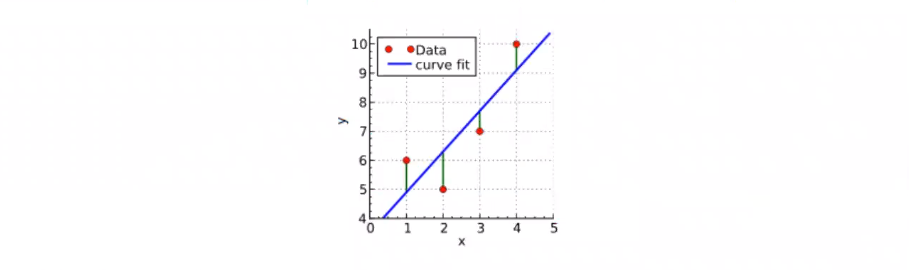

what elements are present in the diagram?

- The red points are the **observed values** of x and y.
- The blue line is the **least squares line**.
- The green lines are the **residuals**, which is the distance between the observed values and the least square line.


The general equation of a straight line is:
$$y = mx+b$$

it means that if we have the value of m and b, we can predict all the values of y for corresponding x.During construction of a Linear Regression Model, the computer tries to calculate the values of m and b to get a straight line.But the question is:

### How Do you know this is the best fit line?

The best fit-line is obtained by minimizing the **_residual_**. Residual is the distance between the actual Y and the predicted Y, as shown below


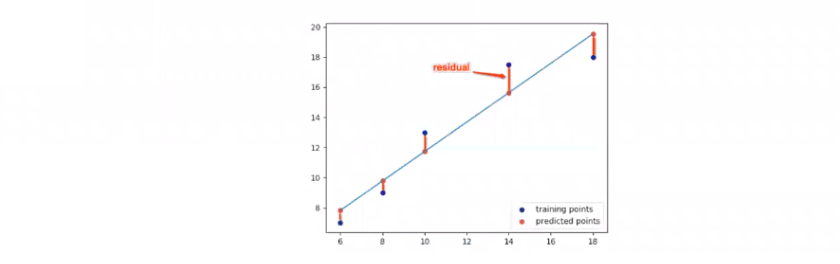

Mathematically,Residual is:
    
$$ r = y - (mx + b) $$
    
Hence,the sum of the square of residuals is:
    

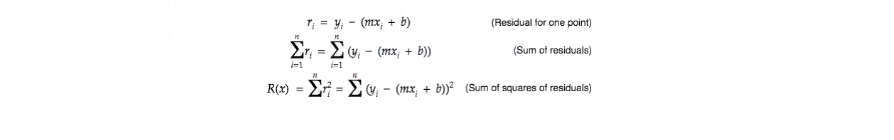

### Gradient Descent


But as the residual's minima is dependent on two variables m and b, it becomes a **_Paraboloid_** and the appropriate m and b are calculated using **_Gradient Descent_** as shown balow:

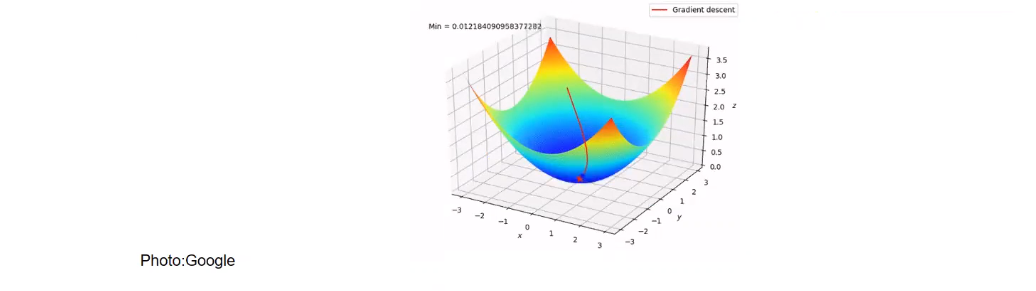

In [7]:
# create X =feature and y = label

x= data [['TV']]
y = data.sales


# follow the usual sklearn pattern: import, instantiate,fit


from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(x,y)

LinearRegression()

In [8]:
# print intercept and coefficients

print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


### Interpreting the model

How do we interpret the coefficent for spends on TV ad(𝛽1)?

- A "unit" increase in spends on a TV ad is **associated with** a 0.047537 "unit" increase in Sales.

-Or, an additional $ 1,000 on TV ads is **translated** to an increase in sales by 47.53 Dollars.

AS an increse in TV ad expenditure is associated with a **decrease** in sales, 𝛽1 would be **negative**.

# Prediction using the model

If the expense on TV ad is $ 50,000 , what will be the sales prediction for that market?

$$ 𝑦= 𝛽0+𝛽1𝑥 $$

$$ y = 7.032594+0.047537*50 $$
 

In [9]:
# Calculate the prediction 

7.032594+0.047537*50

9.409444

   Thus, we would predict Sales of **9,409 widgets** in that market.

## How Least Squares Line changes based on input data (just for Demo purpose)

https://www.desmos.com/calculator/jwquvmikhr









# model Confidence

# how well does the Model Fit the data?


One of the most generic way to evaluate the fit of a linear model is by computing the **R-squared** value. R-squared explains the **proportion of variance**, i.e,the proportion of variance in the observed data which the model explains,or the reduction in error over the **null model**. (A null model only predicts the mean of all the observed responses, and thus it only has an intercept and no slope.)


The value of R-squared lies between 0 and 1. A value closer to 1 is better as it means that more variance is explained by the model.

# $ R^2 statistics $

The R-squared statistic provides a measure of fit. it takes the form of a proportion-- the proportion of variance explained-- and so it always takes on a value between 0 and 1. in simple words, it represents how much of our data is being explained by our model.For example,**R^2** statistic = 0.75, it says that our model fits 75% of the total data set.Similarly, if it is 0,it means none of the data points is being explained and a value of 1 represents 100% data explanation. Mathematically **R^2** statistic is calculated as:

$$ R^2  = \frac{TSS-RSS}{TSS}   = 1- \frac{RSS}{TSS} $$

or,



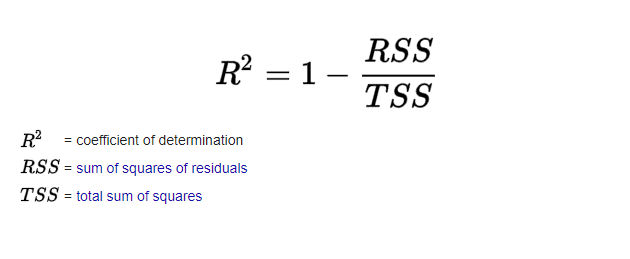

 Where RSS: is the Residual Sum OF squares and is ginen as:
            


$$ RSS = \sum \limits_{i=1}^{n} (y_i - y ^ i )^2 $$


or,

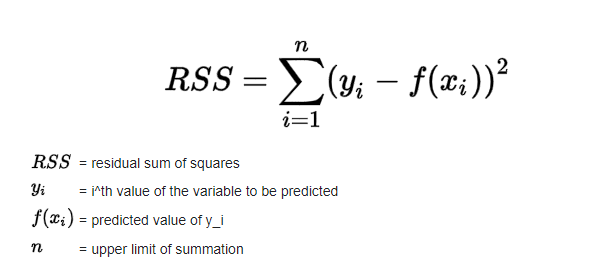

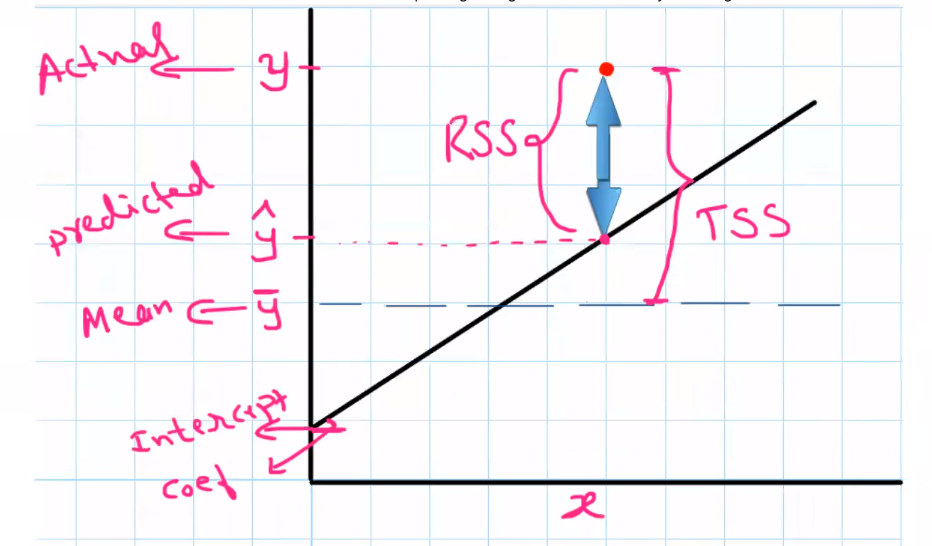

The closer the value of $R^2$ is to 1 the better the modelfits our data. if $R^2$ comes below 0 ( which is possibility) that means the model is so bad that it is performing even worse than the average best fit line.

## Metric to check model performance (r2_score) 

In [10]:
from sklearn.metrics import r2_score

In [11]:
# pass all TV records and predict sales
predicted_sales =lm.predict(x)

In [12]:
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [13]:
predicted_sales

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

In [14]:
# let's compare original sales numbers with our model predicted sales
r2_score(y_true = y, y_pred = predicted_sales)

0.611875050850071

##  Adjusted  𝑅2  statistics 

As we increase the number of independent variables in our equation, the $ R^2 $ increases as well.But that doesn't near that the new independent variables have any correlation with the output variable.in other words, even with the addition of new features in our model, it is not necessary that our model will yield better results but $ R^2 $ value is increase. To rectify this problem, we use Adjusted $ R^2 $ value which penalises excessive use of such features which do not correlate with the output data. Let's understand this with an example:


We can see that $ R^2 $ always increases with an increase in the number of independent variables.Thus, it doesn't give a better picture and so we need Adjusted $ R^2 $ value to keep this in check. Mathematically,it is calculated as:

As we increase the number of independent variables in our equation, the  $𝑅^2$
  increases as well.But that doesn't near that the new independent variables have any correlation with the output variable.in other words, even with the addition of new features in our model, it is not necessary that our model will yield better results but  $𝑅^2$
  value is increase. To rectify this problem, we use Adjusted  $𝑅^2$
  value which penalises excessive use of such features which do not correlate with the output data. Let's understand this with an example:

We can see that  $𝑅^2$
  always increases with an increase in the number of independent variables.Thus, it doesn't give a better picture and so we need Adjusted  $𝑅^2$
  value to keep this in check. Mathematically,it is calculated as:

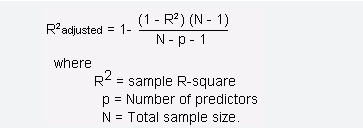


In the equation above, when p = 0, we can see that adjested $𝑅^2$ becomes equal to $𝑅^2$. Thus adjusted 𝑅^2 will always be less
than or equal to $𝑅^2$,and it penalises the excess of independent variables which do not affect the dependent variable.

Is it a "good" R-squared value? Now,that's hard to say. In reality, the domain to which the data belongs to plays a significant role in deciding the threshold for the R-squared value.Therefore, it's a tool for **comparing different models**.

## Multiple Linear Regression


Till now, we have created the model based on only one feature. Now,we'll include multiple features and create a model to see the relationship between those features and the label column. This is called **Multiple Linear Regression**.



$$ y = 𝛽_0 + 𝛽_1x_1 + .... + 𝛽_nx_n $$


Each $x$ represents a different feature, and feature has its own coefficient.In this case:


$$ 𝑦 = 𝛽_0 + 𝛽_1 * TV + 𝛽_2 * Radio + 𝛽_3 * Newspaper $$

Let's use Statsmodels to estimate these coefficients

In [15]:
# create X and Y

x = data[['TV','radio','newspaper']]
y = data.sales

lm = LinearRegression()
lm.fit(x,y)

# print intercept and coefficients

print("Intercept :  ->",lm.intercept_)
print("TV :         ->",lm.coef_[0])
print("Radio :      ->",lm.coef_[1])
print("Newspaper :  ->",lm.coef_[2])

Intercept :  -> 2.9388893694594067
TV :         -> 0.04576464545539761
Radio :      -> 0.18853001691820462
Newspaper :  -> -0.0010374930424762972


How do we intercept these coefficents? If we look at the coefficients, the coefficient for the newspaper spends in negative. It
means that the money spent for newspaper advertisements is not contributing in a positive way to the sales.

In [16]:
# preparing data for R2_score on TV and Radio as we can see they are positively related (co-efficient)

x = data [["TV","radio"]]

y = data.sales

In [17]:
# Let's feed features and lable and train the model
lm.fit(x,y)

LinearRegression()

In [18]:
# Check the R2
predicted_sales = lm.predict(x)
r2_score (y,predicted_sales)

0.8971942610828956

In [19]:
# Let's do the same for all the features

x = data[["TV","radio","newspaper"]]
y = data.sales

# training
lm.fit(x,y)

# r2 
predicted_sales = lm.predict(x)
r2_score(y,predicted_sales)

0.8972106381789522

Selecting the model with the highest value of R-squared is not a correct appoarch as the value of R-squared shall always increse whenever a new feature is taken for consideration enen if the feature is unrelated to the response.

The alternative is to use **adjusted R-squared** which penalises the model complexity(to control overfiting),but this again generally <ins>under-penalizes complexity.</ins>







a better approach to feature selection is **cross-validation.** It provides a more reliable way to choose which of the created models will best **generalise** as is better estimates of out-of-sample error. An advantage is that the cross-validation method can be applied to any machine learning model and the scikit-learn package provides extensive functionality for that.

# Project_1 With Linear Regression

## Problem Statement

#### We need to predict the chance of admission based on the students various scores.


##### Features or Independent variables

- Gre Score
- TOEFL Score
- University Rating 
- SOP
- LOR
- CGPA
- Research


#### Label/Target

- Chance of Admit

#### Always refers sklearn official Documentation if you are not sure about syntax or parameter.

https://scikit-learn.org

In [1]:
# Let's start with importing necessary liabraries

import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# import statsmodels. api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read csv file and convert in to dataframe

Data = pd.read_csv('https://raw.githubusercontent.com/AnviAyu123/Data-scientist/main/Admission_Prediction.csv')
Data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [22]:
Data.shape

(500, 9)

In [23]:
# Understanding the data at high level,
Data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [30]:
Data = Data.drop(columns = ['Serial No.'])
Data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.000000,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.000000,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.000000,103.0,4.0,4.0,5.0,8.43,0,0.73


In [31]:
# fill the null values

Data['University Rating'] = Data ['University Rating'].fillna(Data['University Rating'].mode()[0])

Data['TOEFL Score'] = Data ['TOEFL Score'].fillna(Data['TOEFL Score'].mean())

Data['GRE Score'] = Data ['GRE Score'].fillna(Data['GRE Score'].mean())

In [32]:
# verify if nan's are filled

Data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


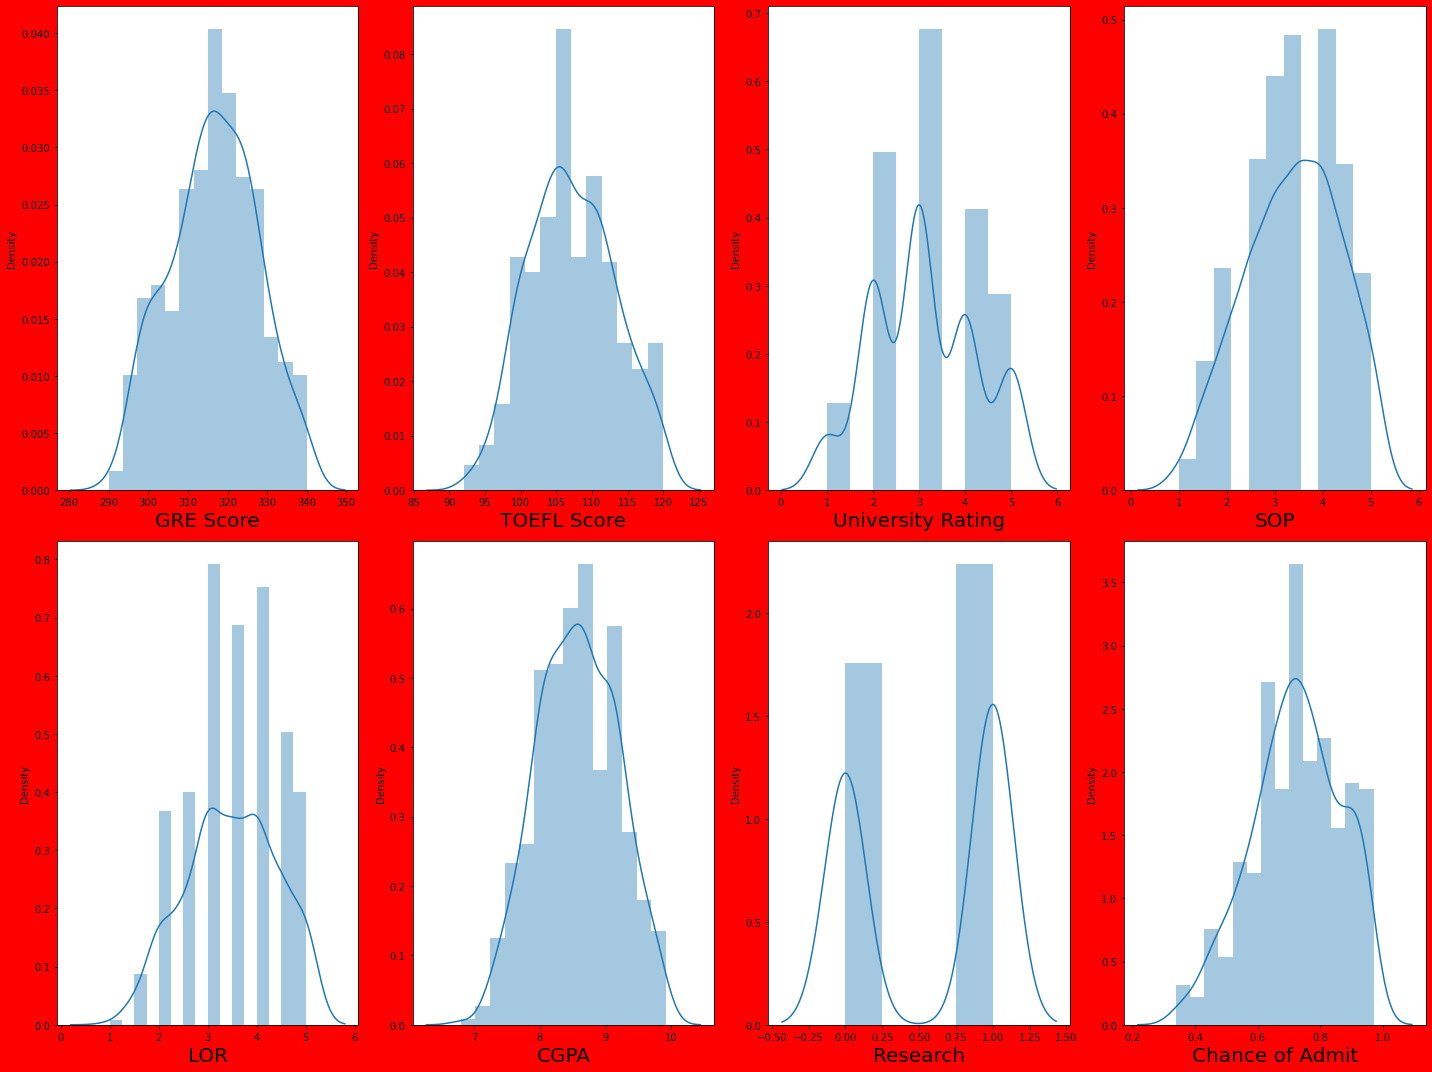

In [33]:
# Let's see how data is distributed for every column

plt.figure(figsize = (20,15), facecolor = 'red')
plotnumber = 1


for column in Data :
    if plotnumber <= 8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(Data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.tight_layout()

The data distribution looks decent enough and there doesn't seem to be any skewness. Great let's go ahead!

Let's observe the relationship between independent variables and dependent variable.

In [34]:
# Divide data set into features and label

y = Data['Chance of Admit']

x = Data.drop(columns = ['Chance of Admit'])

y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [35]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


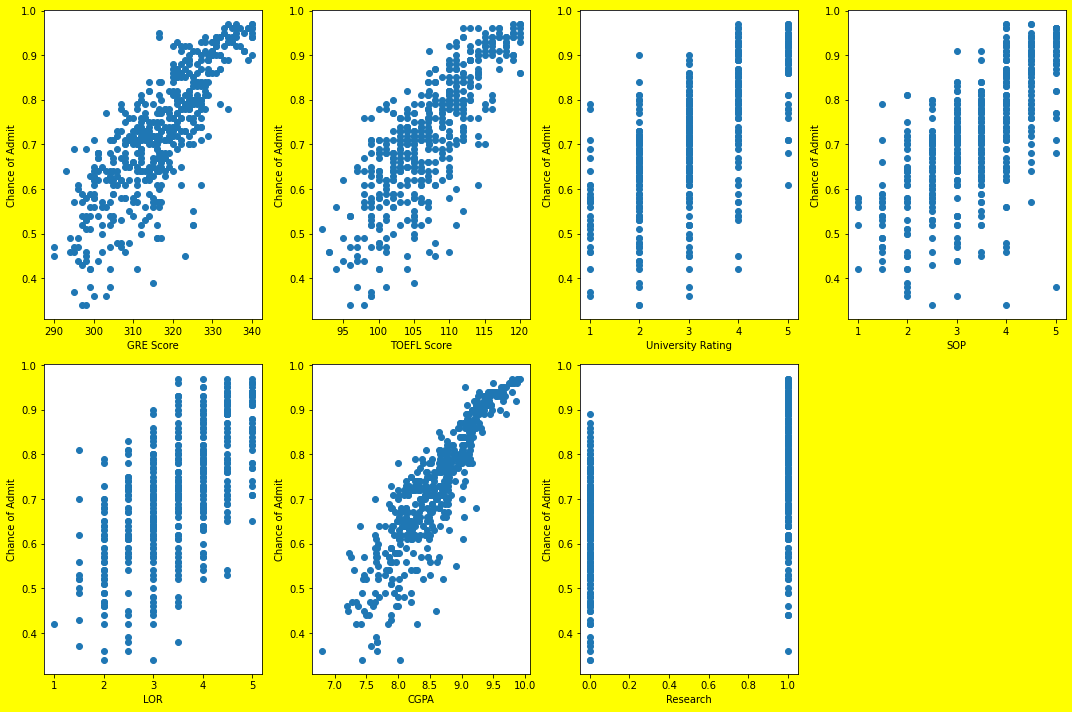

In [38]:
# Visualizing relationship

plt.figure(figsize = (15,10), facecolor = 'yellow')
plotnumber =1

for column in x :
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Chance of Admit',fontsize = 10)
    plotnumber+=1
plt.tight_layout()

Great,the relationship between the dependent and independent variables look fairly linear. Thus,our linearity assumption is
satisfied.

In [ ]:
# we can also get help within notebook and refer whenever you have any confusion.

help (LinearRegression)

In [39]:
# Data Scaling .Formula z = (x-mean)/std

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

x_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

### Example for standard scaler

In [40]:
# we can also get help within notebook and refer whenever you have any confusion.

help (LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |    

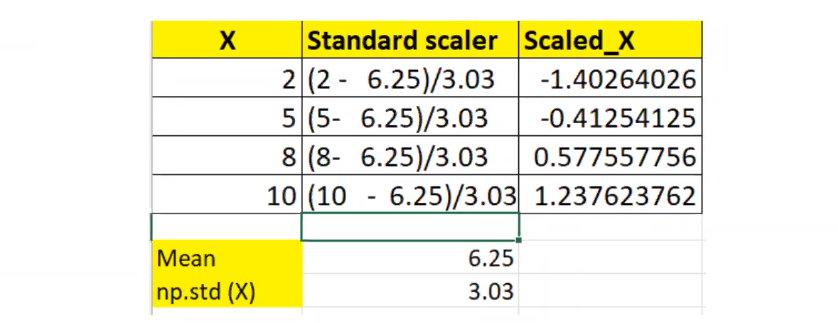